# Requesting Argo REFERENCE data from Ifremer erddap

Show case how to retrieve data from the Argo reference dataset through the Ifremer erddap.

Examples:

- Plot REFERENCE data available around 200db depth for a single year in a specific region
- Data fetching for a specific profile and superimpose nearby REFERENCE data


***
Script prepared by [Guillaume Maze](http://github.com/gmaze) (Mar. 2020)

In [1]:
import sys, os
import numpy as np
import xarray as xr

# Not definitive access to the end-user API:
sys.path.insert(0, os.path.abspath('..'))
from argopy import DataFetcher as ArgoDataFetcher

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Create the Argo data loader instance

Here, we need to specify the dataset from which to retrieve data, the ``reference`` one.

This is done with the ``ds='ref'`` option.

Let's create a data loader instance that will cache data locally for later re-use.

In [2]:
argo_loader = ArgoDataFetcher(ds='ref', cachedir='tmp') # Use cache to save fetched data to limit data transfer usage
# argo_loader = ArgoDataFetcher(ds='ref')
argo_loader

<datafetcher 'Not initialised'>
Fetchers: 'profile', 'float' or 'region'
User mode: standard

# Map of REFERENCE data around 200db depth for a single year

In [3]:
box = [-80., 0., 10., 65., 200-5., 200+5., '2018-01-01','2018-12-31']
ds = argo_loader.region(box).to_xarray()
ds

<xarray.Dataset>
Dimensions:          (index: 2124)
Coordinates:
    time             (index) datetime64[ns] ...
  * index            (index) int64 0 1 2 3 4 5 ... 2118 2119 2120 2121 2122 2123
    longitude        (index) float64 ...
    latitude         (index) float64 ...
Data variables:
    CYCLE_NUMBER     (index) int64 ...
    PLATFORM_NUMBER  (index) int64 ...
    PRES             (index) float64 ...
    PSAL             (index) float64 ...
    PTMP             (index) float64 ...
    TEMP             (index) float64 ...
Attributes:
    DATA_ID:               ARGO_Reference
    DOI:                   http://doi.org/10.17882/42182
    Downloaded_from:       http://www.ifremer.fr/erddap
    Downloaded_by:         gmaze
    Download_date:         2020/03/11
    Download_url:          http://www.ifremer.fr/erddap/tabledap/argo_referen...
    Download_constraints:  ref_[x=-80.00/0.00; y=10.00/65.00; z=195.0/205.0; ...
    cache:                 tmp/ERargo_ref_28000_00000_01000_06500_01950_02050...

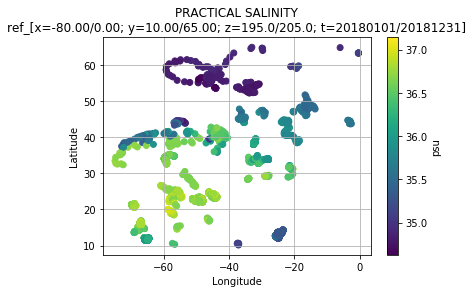

In [4]:
plt.scatter(ds['longitude'], ds['latitude'], c=ds['PSAL'])
plt.colorbar(label=ds['PSAL'].attrs['units'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().grid()
plt.title("%s\n%s" % (ds['PSAL'].attrs['long_name'], ds.attrs['Download_constraints']));

# Example of data fetching for a specific profile and superimpose nearby REFERENCE data

We first need to retrieve data from a regular Argo float.

This is done with the ``ds='phy'`` option. Note that this was not done in the previous notebooks because it is the default option.


In [7]:
ds = ArgoDataFetcher(ds='phy', cachedir='tmp').profile(6902746, 12).to_xarray()
ds

<xarray.Dataset>
Dimensions:          (index: 108)
Coordinates:
  * index            (index) int64 0 1 2 3 4 5 6 ... 101 102 103 104 105 106 107
    latitude         (index) float64 18.8 18.8 18.8 18.8 ... 18.8 18.8 18.8 18.8
    longitude        (index) float64 -59.24 -59.24 -59.24 ... -59.24 -59.24
    time             (index) datetime64[ns] 2017-09-01T06:53:00 ... 2017-09-01T06:53:00
Data variables:
    CYCLE_NUMBER     (index) float64 12.0 12.0 12.0 12.0 ... 12.0 12.0 12.0 12.0
    PLATFORM_NUMBER  (index) int64 6902746 6902746 6902746 ... 6902746 6902746
    PRES             (index) float64 3.0 4.0 5.0 ... 1.963e+03 1.989e+03
    PRES_ERROR       (index) float64 2.4 2.4 2.4 2.4 2.4 ... 2.4 2.4 2.4 2.4 2.4
    PSAL             (index) float64 35.02 35.03 35.03 ... 34.99 34.99 34.99
    PSAL_ERROR       (index) float64 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01 0.01
    TEMP             (index) float64 28.9 28.9 28.9 28.89 ... 3.771 3.734 3.693
    TEMP_ERROR       (index) float64 0.002 0.002 0.002 ... 0.002 0.002 0.002
Attributes:
    DATA_ID:               ARGO
    DOI:                   http://doi.org/10.17882/42182
    Downloaded_from:       http://www.ifremer.fr/erddap
    Downloaded_by:         gmaze
    Download_date:         2020/03/11
    Download_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.c...
    Download_constraints:  phy_WMO6902746_CYC0012
    cache:                 tmp/ERargo_phy_WMO6902746_CYC0012.nc
    history:               Variables selected according to DATA_MODE; Variabl...

In [8]:
# Define a rectangular box around the profile to examine:
dx, dy = 4, 4 # Size of the box around the profile
reference_box = [np.min(ds['longitude']).values-dx, np.max(ds['longitude']).values+dx,
                 np.min(ds['latitude']).values-dy, np.max(ds['latitude']).values+dy,
                 0, 2000, 
                 '2014-09-01','2019-09-01']

# Retrieve REFERENCE data for this box:
ds_ref = ArgoDataFetcher(ds='ref', cachedir='tmp').region(reference_box).to_xarray()
ds_ref

HTTPError: Error 500 
Error {
    code=500;
    message="Internal Server Error: java.io.EOFException";
}

http://www.ifremer.fr/erddap/tabledap/argo_reference.csv?latitude,longitude,time,platform_number,cycle_number,pres,temp,psal,ptmp&longitude>=-63.238&longitude<=-55.238&latitude>=14.804000000000002&latitude<=22.804000000000002&pres>=0&pres<=2000&time>=1409529600.0&time<=1567296000.0&distinct()&orderBy("time,pres")

## Plot profile and surrounding REFERENCE data

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
ax[ix].plot(ds['TEMP'], ds['PRES'], 'r.-')
ax[ix].plot(ds_ref['TEMP'], ds_ref['PRES'], '.', color='lightgray', zorder=0)

ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
ax[ix].plot(ds['PSAL'], ds['PRES'], 'r.-')
ax[ix].plot(ds_ref['PSAL'], ds_ref['PRES'], '.', color='lightgray', zorder=0)
ax[ix].grid()
ax[ix].set_xlabel(ds['PSAL'].attrs['units'])
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

fig.suptitle(ds.attrs['Download_constraints']);

## Map of profile and surrounding REFERENCE data location

In [ ]:
# Get reference profile positions (by floats):
TRAJ = {}
for wmo in np.unique(ds_ref['PLATFORM_NUMBER']):
    traj = []
    for cyc in np.unique(ds_ref.where(ds_ref['PLATFORM_NUMBER']==wmo, drop=True)['CYCLE_NUMBER']):
        this = ds_ref.where(ds_ref['PLATFORM_NUMBER']==wmo, drop=True)\
                       .where(ds_ref['CYCLE_NUMBER']==cyc, drop=True)
        traj.append([np.round(np.unique(this['longitude'])[0],2),np.round(np.unique(this['latitude'])[0],2)])
    TRAJ[wmo] = np.array(traj)
print("WMOs in the reference dataset:\n", TRAJ.keys())

In [ ]:
# Plot
this = ds.reset_coords().groupby('CYCLE_NUMBER').min()
plt.plot(this['longitude'], this['latitude'], 'r.', markersize=20, label=ds.attrs['Download_constraints'])

for wmo in TRAJ:
    plt.plot(TRAJ[wmo][:,0], TRAJ[wmo][:,1], '.-', label= 'ref_WMO' + str(wmo))

plt.legend(fontsize=6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().grid()
plt.title(ds.attrs['Download_constraints']);

***
This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>